In [1]:
import pandas as pd
from exosyspop.populations import TRILEGAL_BGBinaryPopulation

targets = pd.read_hdf('targets.h5')
bgstars = pd.read_hdf('bgstars.h5')

# Sanitize dtypes of targets DataFrame
for c in targets.columns:
    if targets[c].dtype == object:
        targets.loc[:,c] = targets.loc[:,c].astype(str)

pop = TRILEGAL_BGBinaryPopulation(targets, bgstars)

import logging
rootLogger = logging.getLogger()

BGEB: dmag regressor trained, R2=0.977956869974
BGEB: qR regressor trained, R2=0.861276800119
BGEB: Depth trained: R2=0.994342581537
BGEB: Duration trained: R2=0.998828822233
BGEB: Slope trained: R2=0.990229541077


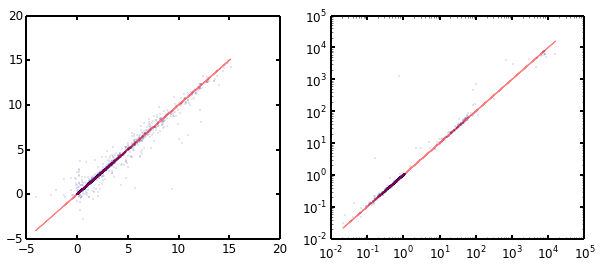

In [5]:
%matplotlib inline
rootLogger.setLevel(logging.INFO)
pop._train_pipelines(n_jobs=1, plot=True)
pop._train_trap(N=1000)
rootLogger.setLevel(logging.DEBUG)

In [6]:
pop.save('bgpop', overwrite=True)

In [7]:
pop = TRILEGAL_BGBinaryPopulation.load('bgpop')

In [8]:
obs = pop.observe(regr_trap=True)

In [9]:
rootLogger.setLevel(logging.INFO)
%timeit pop.observe(new=True, regr_trap=True)

1 loops, best of 3: 371 ms per loop


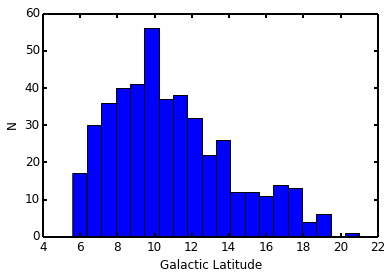

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
obs = pop.observe(new=True)
plt.hist(obs.b_target.values, bins=20);
plt.xlabel('Galactic Latitude')
plt.ylabel('N');